<a href="https://colab.research.google.com/github/Afif-Ghifari/ML_S5_2025/blob/main/ML_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>JS11 - Klasifikasi 2</h1>

<b>Nama : Muhammad Afif Al Ghifari</b><br>
<b>Kelas: TI-3H</b><br>
<b>NIM  : 2341720168</b>

## Praktikum 1

### Langkah 1 - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Langkah 2 - Membuat Data Dummy

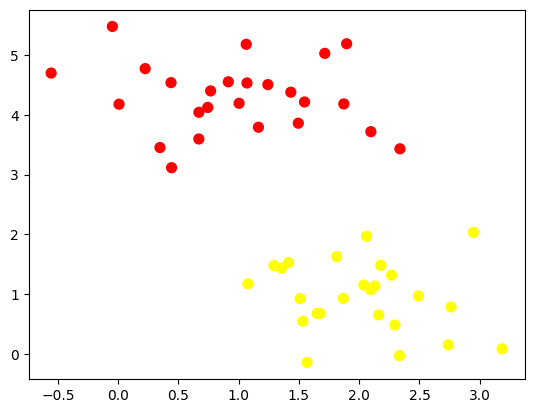

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### Langkah 3 - Buat Ilustrasi Garis Pemisah

(-1.0, 3.5)

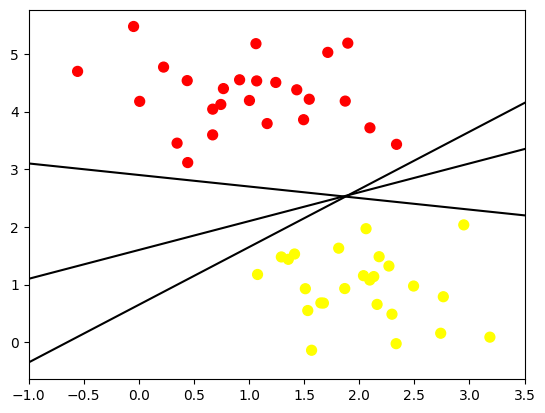

In [ ]:
# Membuat ilustrasi garis pemisah
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)

### Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

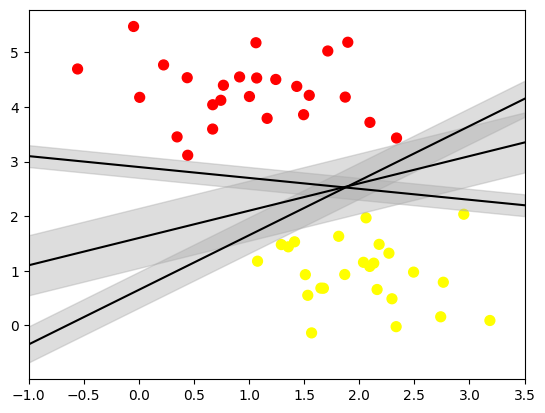

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### Langkah 5 - Fitting Model

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

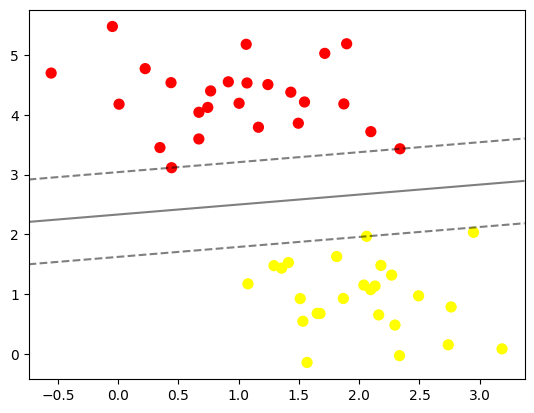

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

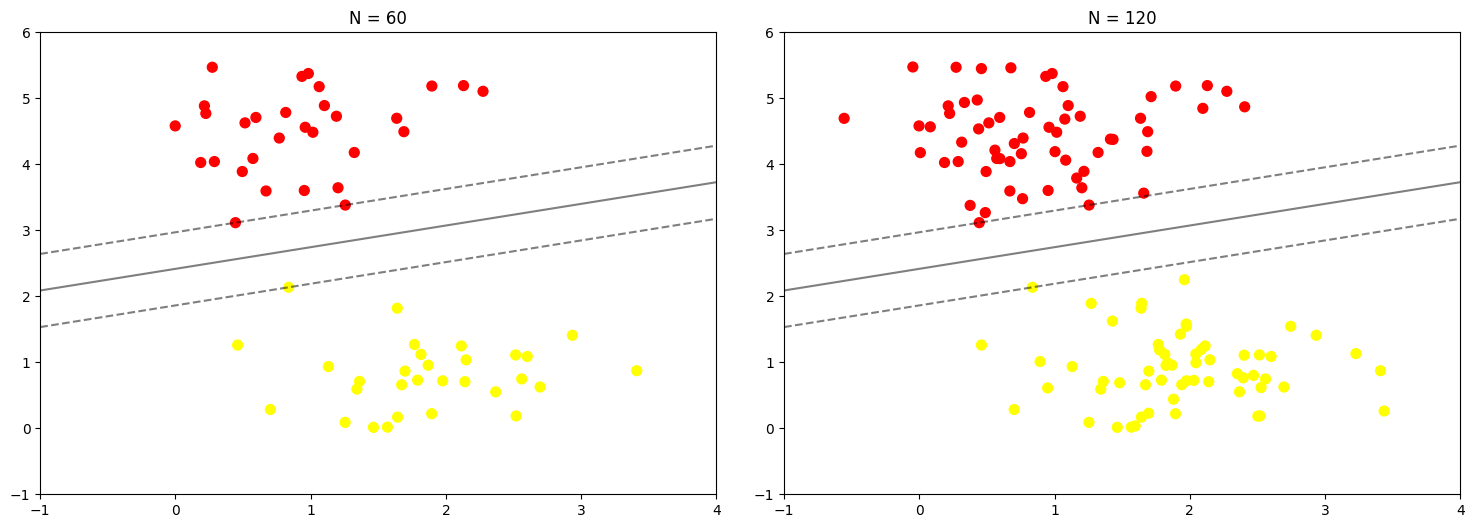

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## Praktikum 2

### Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Buat Data Dummy Non-Linier

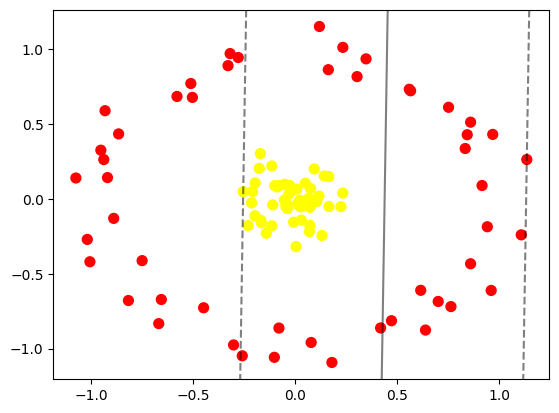

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.10275693, -1.0577118 ],
       [-0.89025963, -0.12912224],
       [-0.16630765, -0.15815857],
       [ 0.41804971, -0.86154866],
       [ 0.4713925 , -0.81325713],
       [-0.02761913,  0.09032046],
       [ 0.07141771, -0.17578382],
       [ 0.00685887,  0.06657234],
       [-0.51209904,  0.77235344],
       [-0.86606421,  0.43541776],
       [ 0.0651028 ,  0.00417876],
       [ 0.06646203, -0.00331636],
       [ 0.02612509, -0.05279277],
       [ 0.06843534, -0.21742292],
       [-0.44949628, -0.72657408],
       [-0.11509793, -0.17851384],
       [-0.16891852, -0.14313863],
       [-0.27974216,  0.94608738],
       [-1.01961469, -0.26982248],
       [ 0.84261629,  0.43002051],
       [ 0.16371562,  0.14998532],
       [-0.93252161,  0.59051957],
       [ 0.16169998,  0.86473807],
       [ 0.75109657,  0.61340534],
       [ 0.61475243, -0.60994348],
       [ 0.1793404 , -1.09226508],
       [-0.25534144,  0.04961694],
       [ 0.34668424,  0.93708897],
       [ 0.07120937, -0.05536248],
       [-0.19685926,  0.10780736],
       [-0.1107238 , -0.03898233],
       [-0.21418006, -0.02548377],
       [-0.00818108, -0.15422794],
       [ 0.10515369, -0.01661464],
       [-0.03909069, -0.0631881 ],
       [ 0.01054238, -0.03329017],
       [-0.03168247,  0.0323518 ],
       [ 0.07464056,  0.07032113],
       [-0.50454572,  0.6794575 ],
       [-0.75086876, -0.41157956],
       [-0.09027111,  0.08090804],
       [ 0.003585  , -0.31770968],
       [-0.31956298,  0.97235671],
       [-0.93877425,  0.26394995],
       [-0.07870425,  0.09045408],
       [-0.17126887,  0.30362754],
       [ 0.04944406,  0.10552216],
       [ 0.14169151,  0.1541674 ],
       [-0.19778762, -0.11139302],
       [ 0.30265957,  0.81841688],
       [-0.92061647,  0.14347314],
       [ 0.1305116 , -0.24345737],
       [ 0.56512585,  0.72363327],
       [ 0.11813292,  1.15351964],
       [-0.08017208, -0.86224512],
       [-0.05371511, -0.00707286],
       [-0.30258347, -0.97511241],
       [ 0.96763733,  0.43203278],
       [ 0.91523575,  0.09046023],
       [-0.14243424, -0.22850426],
       [ 0.1157343 ,  0.02012786],
       [ 0.83279925,  0.33785527],
       [ 0.23304937,  1.01390616],
       [ 0.02253037, -0.00685101],
       [-0.57994208,  0.68584873],
       [-0.26005773, -1.04760618],
       [ 0.76286872, -0.71853185],
       [ 0.85916127, -0.43246129],
       [ 0.08635637, -0.00672134],
       [-0.10037218,  0.08963244],
       [-0.04297856, -0.03267848],
       [ 0.22352864, -0.05088645],
       [-0.95321655,  0.32661528],
       [ 0.85924193,  0.51384921],
       [-0.65673885, -0.67132552],
       [-1.00682334, -0.41905263],
       [ 0.55869117,  0.73382105],
       [ 0.70037913, -0.68449795],
       [ 0.95998013, -0.61093475],
       [ 1.13462225,  0.26428236],
       [-0.81808996, -0.6781521 ],
       [-0.04623846, -0.04993167],
       [-0.20984041,  0.05100541],
       [ 0.23270042,  0.04013238],
       [ 0.16476327, -0.04963018],
       [-0.3298894 ,  0.89164597],
       [ 1.10735436, -0.23920426],
       [-0.02406688,  0.04918115],
       [-0.0422268 , -0.0282072 ],
       [-0.23160489, -0.1775072 ],
       [-0.1767964 ,  0.20501643],
       [-1.0755126 ,  0.14079946],
       [-0.11532829,  0.22131087],
       [ 0.63815932, -0.87552776],
       [ 0.9409928 , -0.18509923],
       [ 0.0776726 , -0.95859468],
       [-0.05171357,  0.09893675],
       [ 0.09276582,  0.20120391],
       [-0.6693372 , -0.83251963],
       [ 0.02948963, -0.14067825]]), y=array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]))>

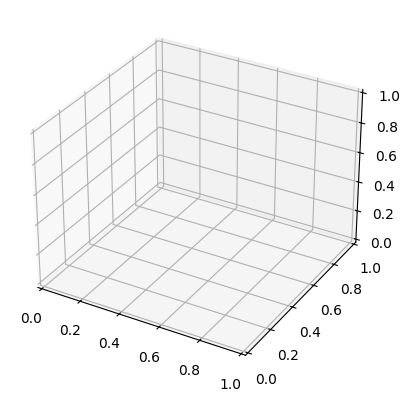

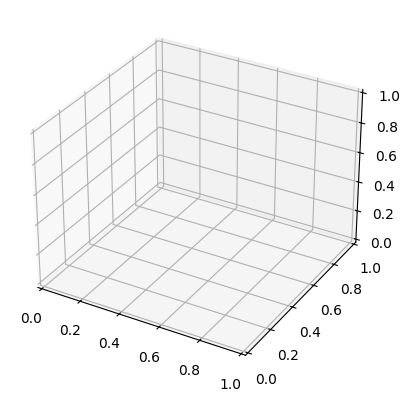

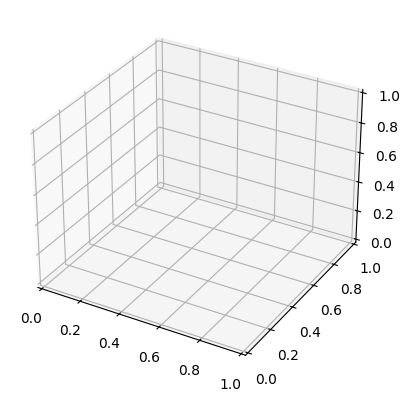

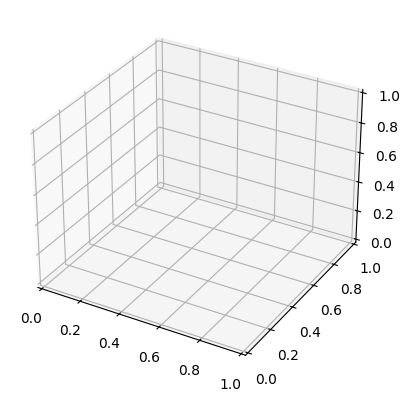

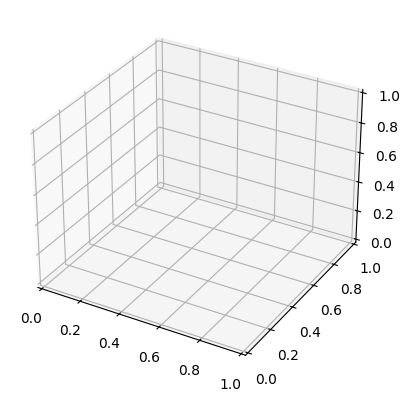

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

### Langkah 2 - Fitting Model

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

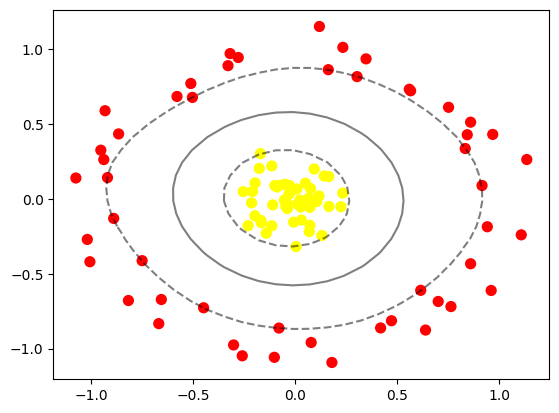

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Praktikum 3

### Langkah 1 - Import Library dan Buat Fungsi Plotting

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 2 - Buat Data Dummy

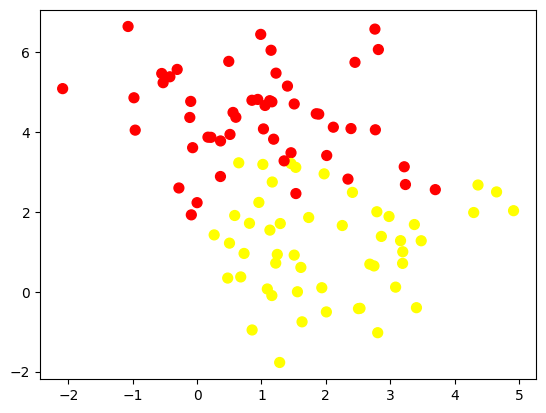

In [3]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### Langkah 3 - Analisis Dampak Tunning

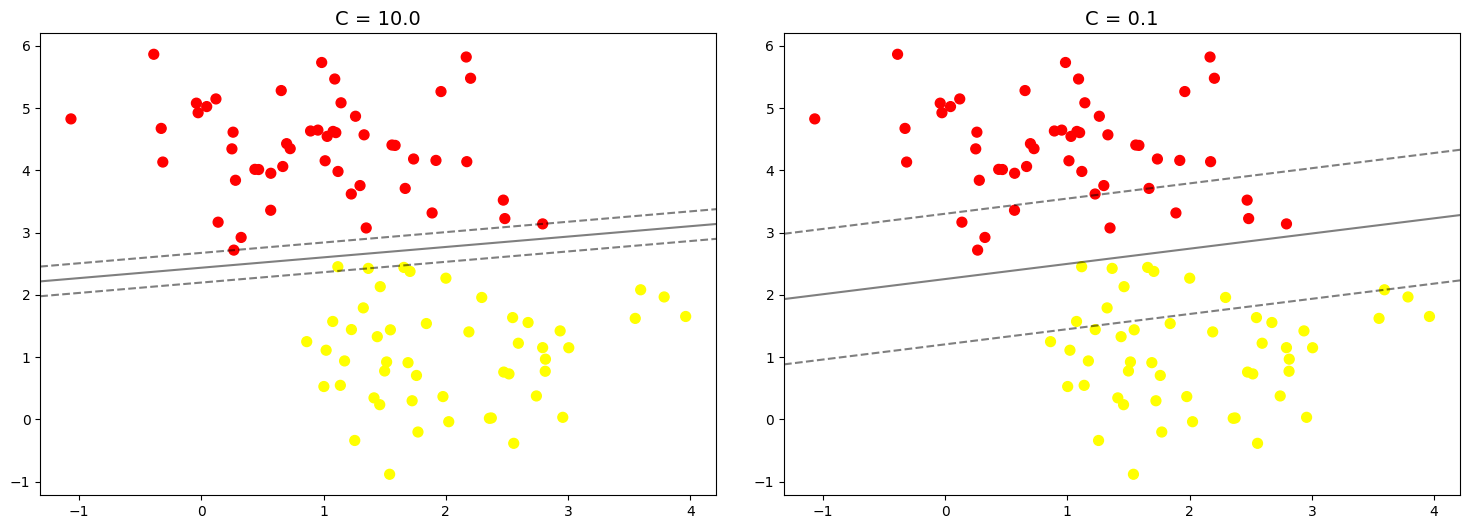

In [4]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Praktikum 4

### Langkah 0 - Unduh Dataset

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


### Langkah 1 - Inspeksi Citra Wajah

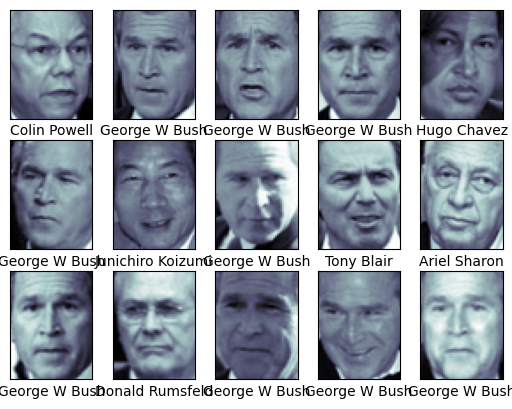

In [3]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Langkah 2 - Pra Pengolahan Data

In [4]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

### Langkah 3 - Split Data

In [5]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

### Langkah 4 - Pembuatan Model + Tunning

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 45s, sys: 219 ms, total: 1min 45s
Wall time: 1min 29s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [7]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

### Langkah 5 - Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

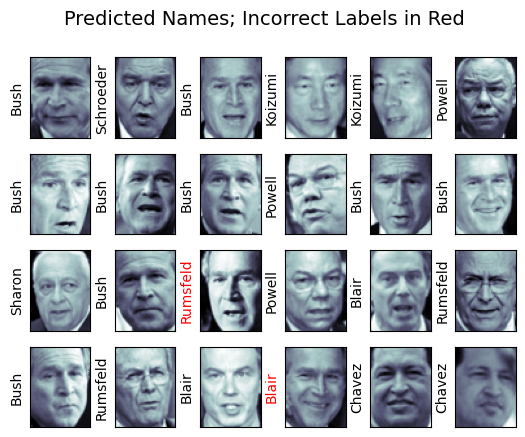

In [8]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

### Langkah 6 - Cek Performansi

In [9]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

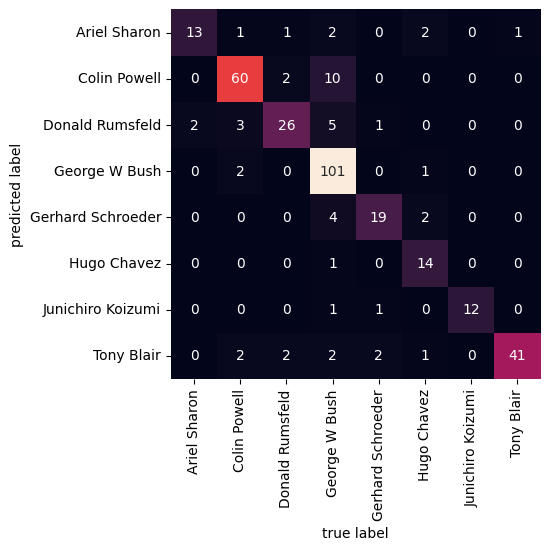

In [10]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Praktikum 5

### Langkah 0 - Import Library

In [11]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [12]:
# Image directories
test_dir = "/content/drive/MyDrive/TI-3H/ML/images/test"
train_dir = "/content/drive/MyDrive/TI-3H/ML/images/training"

### Langkah 1 - Load Data dan Visualisasikan

In [13]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [14]:
# Load training data
train_img = load_dataset(train_dir)

In [15]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[137, 179, 229],
         [137, 179, 229],
         [136, 178, 228],
         ...,
         [134, 177, 222],
         [134, 177, 222],
         [134, 177, 222]],
 
        [[140, 182, 232],
         [140, 182, 232],
         [140, 182, 232],
         ...,
         [133, 176, 221],
         [134, 177, 222],
         [134, 177, 222]],
 
        [[137, 179, 229],
         [137, 179, 229],
         [137, 179, 229],
         ...,
         [133, 176, 221],
         [133, 176, 221],
         [134, 177, 222]],
 
        ...,
 
        [[129, 121, 110],
         [107,  99,  88],
         [100,  94,  82],
         ...,
         [ 92,  86,  90],
         [ 92,  86,  90],
         [ 92,  86,  90]],
 
        [[128, 120, 109],
         [ 95,  87,  76],
         [ 95,  87,  76],
         ...,
         [ 91,  86,  90],
         [ 91,  86,  90],
         [ 91,  86,  90]],
 
        [[120, 112, 101],
         [ 91,  83,  72],
         [ 92,  84,  73],
         ...,
         [ 91,  86,  90],
  

In [16]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 86
(555, 800, 3)


In [17]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (700, 1280, 3)
Label	: night


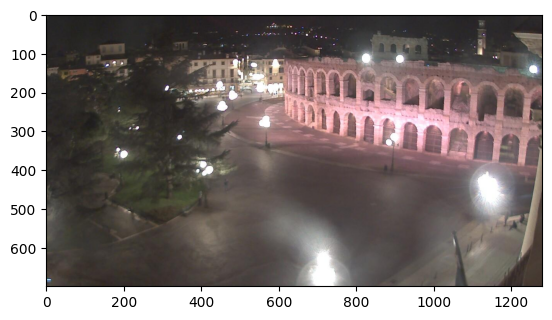

In [18]:
random_img_viz(train_img)

### Langkah 3 - Pra Pengolahan Data

In [19]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [20]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [21]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [22]:
train_std_img_list = preprocess(train_img)

In [23]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 157
(600, 1100, 3)


### Langkah 4 - Ekstraksi Fitur

In [24]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 124
Avg Brighness: 98.7059


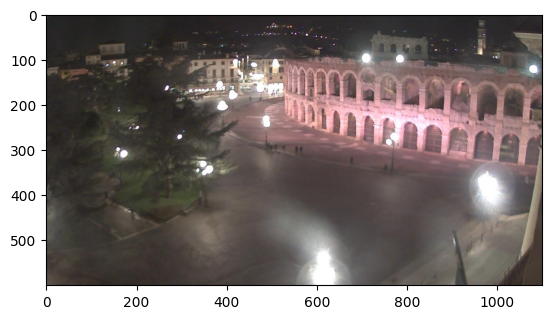

In [25]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### Langkah 5 - Klasifikasi dengan Metode Threshold

In [26]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 173
Actual label: 0
Predicted label: 0


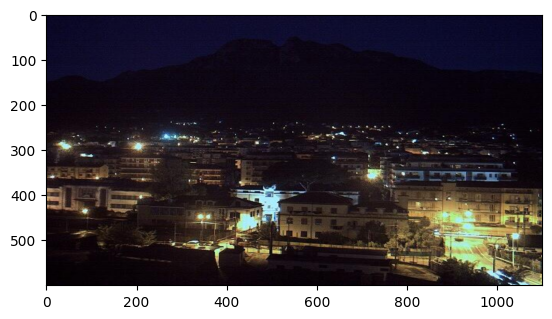

In [27]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Langkah 6 - Cek Performansi

In [28]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [29]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [30]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### Klasifikasi dengan SVM

### Langkah 4 Alternatif - Membuat Feature Vectors.

In [31]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [32]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,191.274988,1.0
1,148.774148,1.0
2,108.419868,1.0
3,154.199915,1.0
4,116.668502,1.0


### Langkah 5 - Buat Model SVM

In [35]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,94.264071,0.0
1,51.373026,0.0
2,87.567647,0.0
3,98.786179,0.0
4,23.519689,0.0


In [36]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

### Langkah 6 - Evaluasi

In [37]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


## Tugas Praktikum

1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

  - Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
    - Gunakan model dengan kernel linier.
    - Gunakan model dengan kernel polynomial.
    - Gunakan model dengan kernel RBF.

  - Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [38]:
# SVM untuk klasifikasi suara (voice.csv) – versi ditulis ulang
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = Path("/content/voice.csv")
if not file_path.is_file():
    raise FileNotFoundError(f"File voice.csv tidak ditemukan pada lokasi: {file_path.resolve()}")

df = pd.read_csv(file_path)

if "label" not in df.columns:
    raise KeyError("Kolom label tidak ditemukan. Pastikan dataset memiliki kolom bernama 'label'.")

# Memastikan kolom fitur numerik
feature_columns = [col for col in df.columns if col != "label"]
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors="coerce")

# Menghapus data yang rusak / NaN
df = df.dropna()

# Konversi label male/female menjadi 0/1
label_dict = {"male": 0, "female": 1}
df["label"] = df["label"].map(label_dict)

if df["label"].isna().any():
    raise ValueError("Ditemukan label selain male/female. Silakan periksa isi dataset.")

X_data = df[feature_columns].to_numpy()
y_data = df["label"].astype(int).to_numpy()

tes_sizes = [0.30, 0.20]    # untuk 70:30 dan 80:20
kernel_ops = [
    ("linear", {"kernel": "linear", "random_state": 42}),
    ("poly",   {"kernel": "poly",   "degree": 3, "random_state": 42}),
    ("rbf",    {"kernel": "rbf",                "random_state": 42}),
]

hasil = []

for t in tes_sizes:

    X_latih, X_uji, y_latih, y_uji = train_test_split(
        X_data,
        y_data,
        test_size=t,
        random_state=42,
        stratify=y_data
    )

    rasio_str = f"{int((1-t)*100)}:{int(t*100)}"

    for nama_kernel, args_svc in kernel_ops:

        # Pipeline scaler + SVC
        model = Pipeline([
            ("scaler", StandardScaler()),
            ("svm", SVC(**args_svc))
        ])

        model.fit(X_latih, y_latih)

        akurasi_train = accuracy_score(y_latih, model.predict(X_latih))
        akurasi_test  = accuracy_score(y_uji, model.predict(X_uji))

        hasil.append({
            "split": rasio_str,
            "kernel": nama_kernel,
            "acc_train": akurasi_train,
            "acc_test": akurasi_test
        })

hasil_df = pd.DataFrame(hasil).sort_values(["split", "kernel"]).reset_index(drop=True)

print("\n== Rekap Hasil Percobaan SVM ==")
print(hasil_df)

# Pivot untuk perbandingan cepat akurasi test
try:
    print("\nPivot akurasi (test accuracy):")
    print(hasil_df.pivot(index="kernel", columns="split", values="acc_test"))
except:
    pass



== Rekap Hasil Percobaan SVM ==
   split  kernel  acc_train  acc_test
0  70:30  linear   0.977898  0.969506
1  70:30    poly   0.967975  0.949527
2  70:30     rbf   0.984664  0.981073
3  80:20  linear   0.977901  0.968454
4  80:20    poly   0.968035  0.952681
5  80:20     rbf   0.986188  0.979495

Pivot akurasi (test accuracy):
split      70:30     80:20
kernel                    
linear  0.969506  0.968454
poly    0.949527  0.952681
rbf     0.981073  0.979495
